In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reducing noise on Data

Original post on [StackOverFlow](https://stackoverflow.com/questions/37598986/reducing-noise-on-data)
### Signal with noise

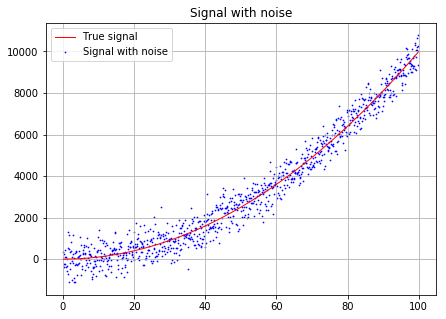

In [41]:
mu, sigma = 0, 500

x = np.arange(0.1, 100, 0.1)  # x axis
z = np.random.normal(mu, sigma, len(x))  # noise
y = x ** 2 + z # data
yT = x ** 2
plt.figure(figsize=(7,5))
plt.scatter(x, y, c="b", s=0.5, label='Signal with noise')
plt.plot(x, yT, linewidth=1, linestyle="-", c="r", label='True signal')
plt.title('Signal with noise')
plt.grid(True)
plt.legend()
# plt.plot(x, y, linewidth=0.5, linestyle="-", c="b")  # it include some noise

### Add filter from Scipy

In [42]:
from scipy.signal import lfilter

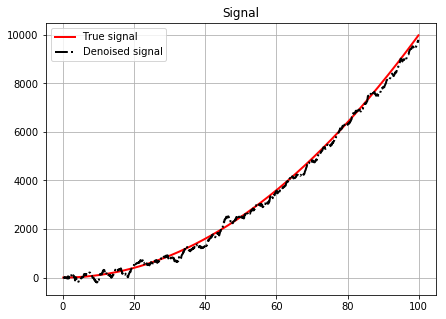

In [58]:
n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)

plt.figure(figsize=(7,5))
# plt.scatter(x, y, c="b", s=0.5, label='Signal with noise')
plt.plot(x, yT, linewidth=2, linestyle="-", c="r", label='True signal')
plt.plot(x, yy, linewidth=2, linestyle="-.", c="k", label='Denoised signal')
plt.title('Signal')
plt.grid(True)
plt.legend()

# plt.plot(x, yy, linewidth=2, linestyle="-", c="b")  # smooth by filter

[1, 100, 0, 100]

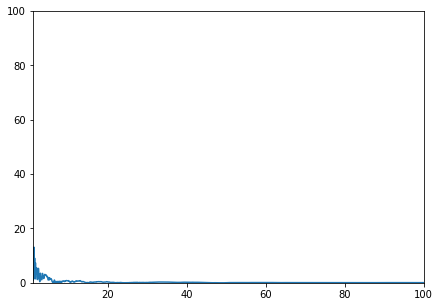

In [57]:
plt.figure(figsize=(7,5))
plt.plot(x, np.abs(yT-yy)/yT)
plt.axis([1, 100, 0, 100])

## Kalman filtering

This is code implements the example given in pages 11-15 of [An Introduction to the Kalman Filter](https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf) by Greg Welch and Gary Bishop, University of North Carolina at Chapel Hill, Department of Computer Science.

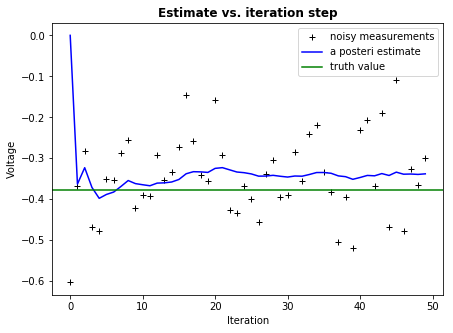

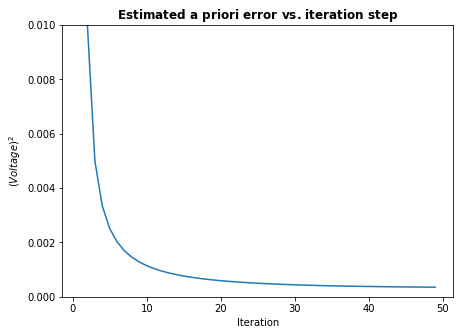

In [61]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

# by Andrew D. Straw

plt.rcParams['figure.figsize'] = (7, 5)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()